In [1]:
from clip_retrieval.clip_client import ClipClient, Modality
from tqdm import tqdm
import clip
from PIL import Image
import torch
from matplotlib import pyplot as plt
import requests
from io import BytesIO
import os

# Loading the clip retrieval client which is used to search images
client = ClipClient(url="https://knn.laion.ai/knn-service", indice_name="laion5B-H-14")

model_name = ['ViT-L/14','RN50x16']

device = 'cuda' if torch.cuda.is_available() else 'cpu'
models = []
preprocesses = []
for model_name in model_name:
    model, preprocess = clip.load(model_name, device=device)
    models.append(model)
    preprocesses.append(preprocess)

/home/mateusz/anaconda3/envs/pons/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [3]:
items = ['shoe', 'handbag', 'nail polish', 'hat', 't shirt', 'coat','perfume']
brands = ['gucci', 'prada', 'chanel', 'dior', 'versace', 'nike', 'puma',
         'adidas', 'ralph lauren', 'armani', 'dolce & gabbana',
         'max factor', 'loreal', '']
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'black',
                'white', 'grey', 'brown', 'beige', 'gold', 'silver', 'multicolor']

full_description = [f"{color} {brand} {item}" for item in items for brand in brands for color in colors]

descriptions_tokens = []

descriptions_tokens = clip.tokenize(full_description).to(device)

In [35]:
# Loop over the descriptions and embed them.
text_embeddings = []
n = 2048
for i in range(len(models)):
    with torch.no_grad():
        temp_embeddings = []
        for j in tqdm(range(0, len(descriptions_tokens), n)):
            embeds = models[i].encode_text(descriptions_tokens[j:j+n])
            temp_embeddings.append(embeds)
    text_embeddings.append(torch.cat(temp_embeddings, dim=0))

data_embeddings = torch.stack(text_embeddings)

100%|██████████| 1/1 [00:15<00:00, 15.93s/it]


In [33]:
data_embeddings /= data_embeddings.norm(dim=1, keepdim=True)

In [7]:
torch.save(data_embeddings, "data_embeddings.pt")

Original caption:  парфюмерные ингредиенты жасмин
white gucci perfume score: 0.27
beige gucci perfume score: 0.27
green gucci perfume score: 0.26


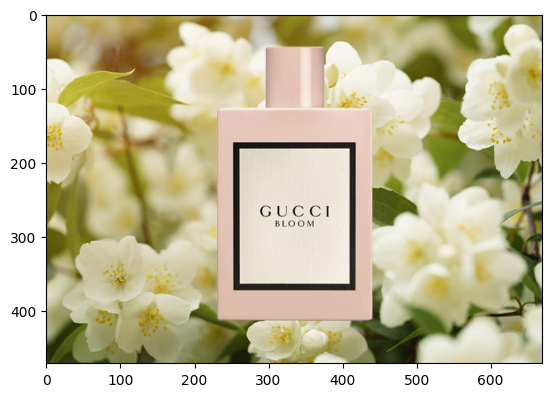

Original caption:  Gucci Bloom
pink gucci perfume score: 0.26
white gucci perfume score: 0.25
green gucci perfume score: 0.25


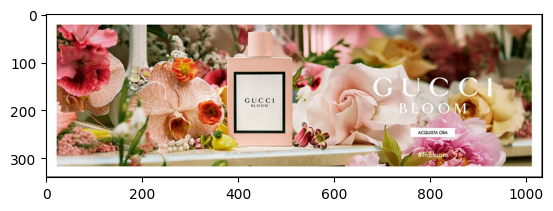

Original caption:  Échantillons GRATUITS du parfum Gucci Bloom
multicolor gucci perfume score: 0.26
pink gucci perfume score: 0.26
white gucci perfume score: 0.25


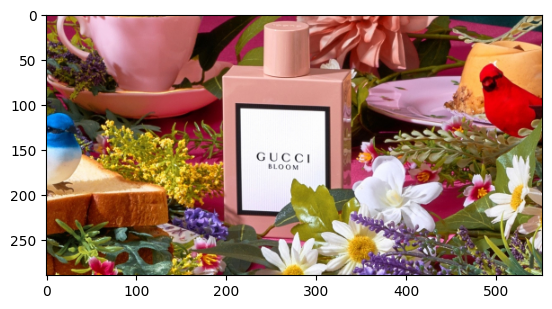

Original caption:  Si eres fan de Gucci Bloom  vas a desear (y mucho) su nuevo ritual de belleza
pink gucci perfume score: 0.25
beige gucci perfume score: 0.25
white gucci perfume score: 0.25


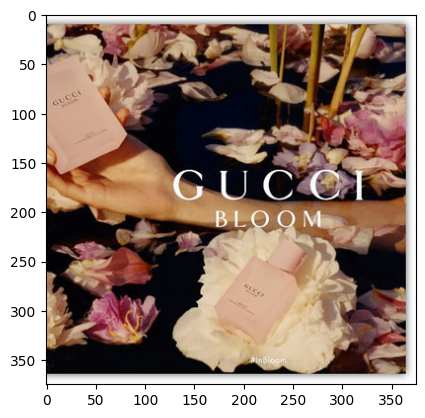

Original caption:  Max Factor Nailfinity Gel Colour Nº 420
red max factor nail polish score: 0.31
red max factor coat score: 0.28
red max factor shoe score: 0.28


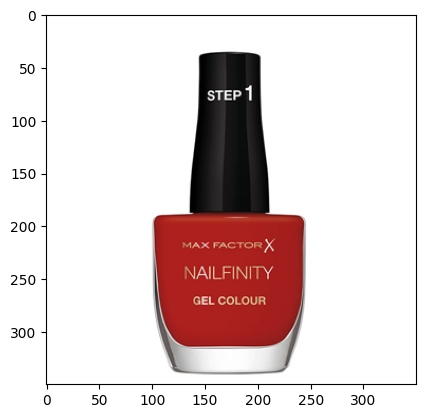

Original caption:  Belleza Mujer Esmalte para uñas Max Factor Nailfinity 300-ruby Tuesday
red max factor nail polish score: 0.32
red max factor coat score: 0.29
red max factor shoe score: 0.29


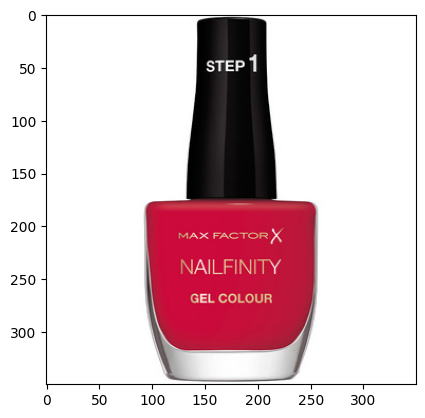

Original caption:  Love OPI XoXo Collectie
red ralph lauren nail polish score: 0.25
red loreal nail polish score: 0.24
red dolce & gabbana nail polish score: 0.24


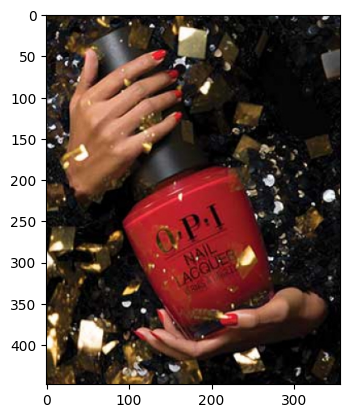

Original caption:  Max Factor Nailfinity Gel Colour Nº 240
purple max factor nail polish score: 0.31
brown max factor nail polish score: 0.30
red max factor nail polish score: 0.29


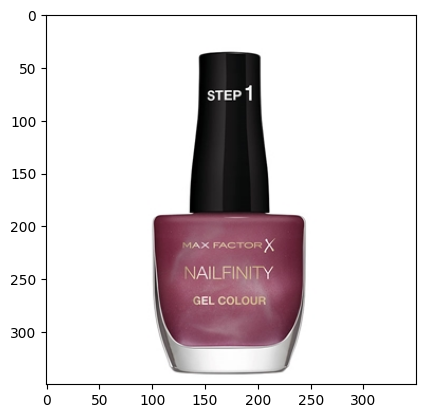

Original caption:  Jordan Air 1 Retro High OG sneakers
red nike shoe score: 0.21
red  shoe score: 0.20
white  shoe score: 0.20


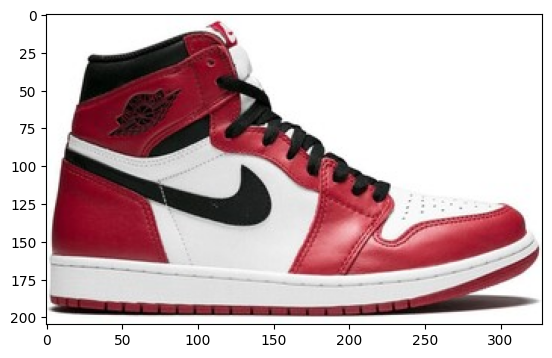

Original caption:  Air Jordans 1
red nike shoe score: 0.21
red  shoe score: 0.20
white  shoe score: 0.20


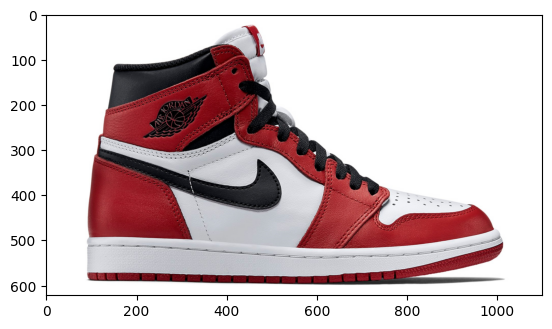

Original caption:  Jordan Air 1 Retro High OG black toe
red nike shoe score: 0.20
white  shoe score: 0.20
red  shoe score: 0.20


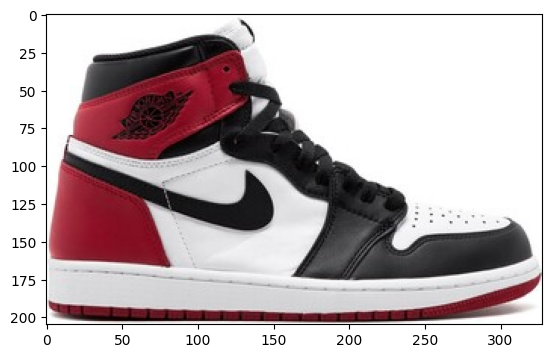

Original caption:  Air Jordan 1 Retro
white  shoe score: 0.20
red nike shoe score: 0.20
red  shoe score: 0.19


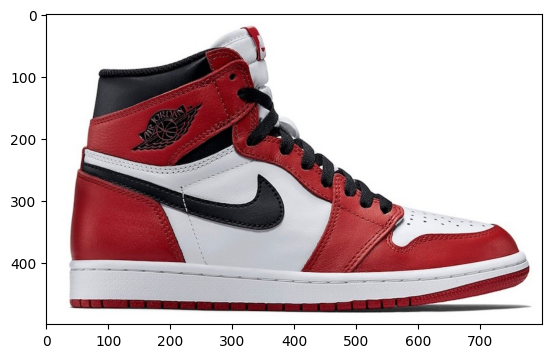

Original caption:  """Nike Air Jordan 1 Retro High OG """"Chicago"""""""
red nike shoe score: 0.20
red  shoe score: 0.20
white  shoe score: 0.19


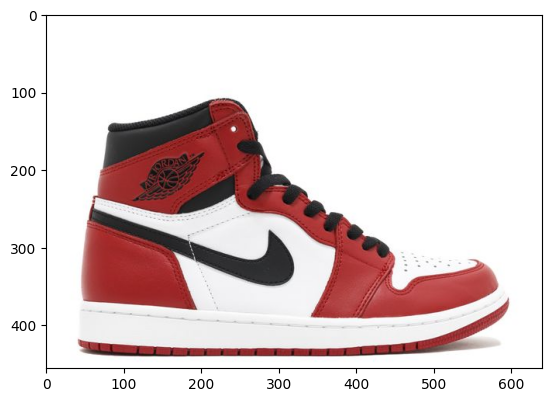

Original caption:  Sneakers
multicolor versace shoe score: 0.23
multicolor loreal shoe score: 0.21
multicolor  shoe score: 0.21


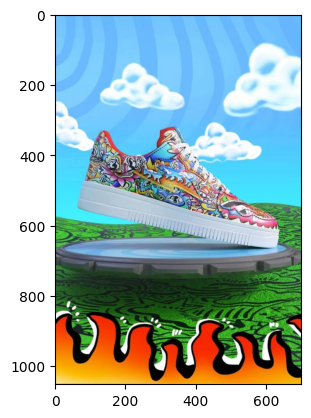

Original caption:  Elles étaient proposées à 3 000, 5000 ou 10 000 dollars la paire. Le 27 février, la marque Rtfkt a mis en vente des sneakers virtuelles customisées par l'artiste Fewocious. Photo Rtfkt Studios.
multicolor versace shoe score: 0.24
multicolor prada shoe score: 0.23
multicolor  shoe score: 0.22


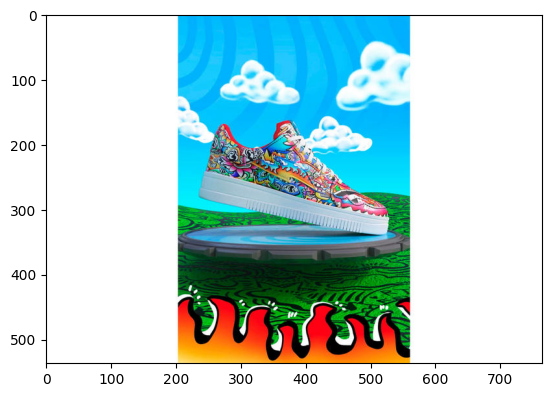

Original caption:  Одна из 121 пары виртуальных кроссовокFewo X RTFKT ($10 тыс.). Покупатель также получит настоящую обувь
multicolor versace shoe score: 0.23
multicolor  shoe score: 0.21
multicolor loreal shoe score: 0.21


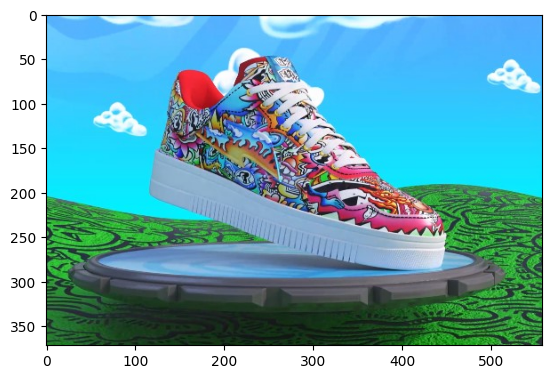

Original caption:  A Sale of Virtual Sneakers Raised $3.1 Million USD in Seven Minutes
silver puma shoe score: 0.23
red puma shoe score: 0.23
black puma shoe score: 0.22


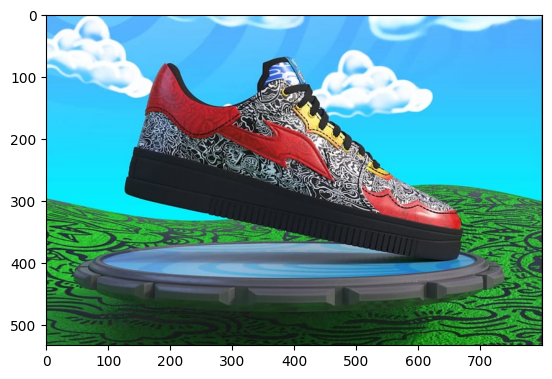

Original caption:  unpaired red Nike sneaker
red nike shoe score: 0.28
red nike perfume score: 0.25
red nike nail polish score: 0.24


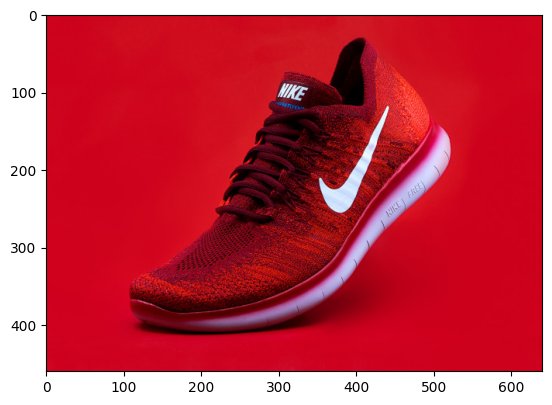

Original caption:  footwear unpaired red Nike sneaker apparel
red nike shoe score: 0.28
red nike perfume score: 0.26
red nike nail polish score: 0.25


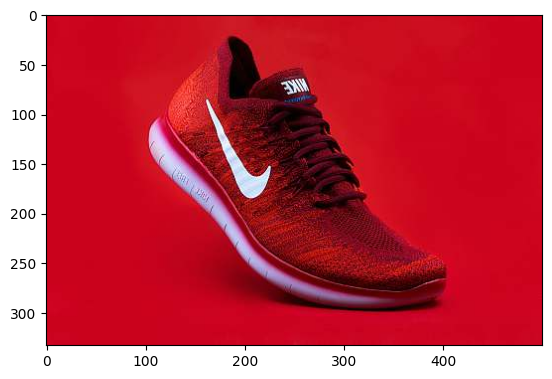

Original caption:  interesting facts about nike
red nike shoe score: 0.28
red nike perfume score: 0.25
red nike nail polish score: 0.25


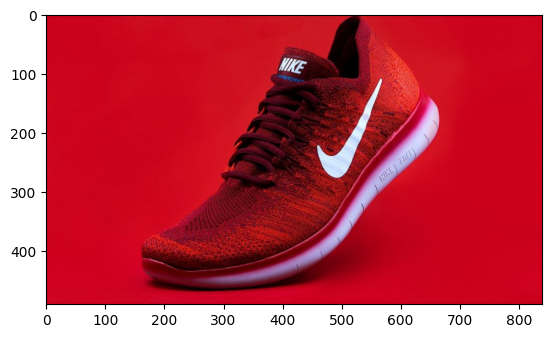

Original caption:  Nike, history, shoes, brand, sports, life, facts, entertainment
red nike shoe score: 0.29
red nike perfume score: 0.26
red nike nail polish score: 0.25


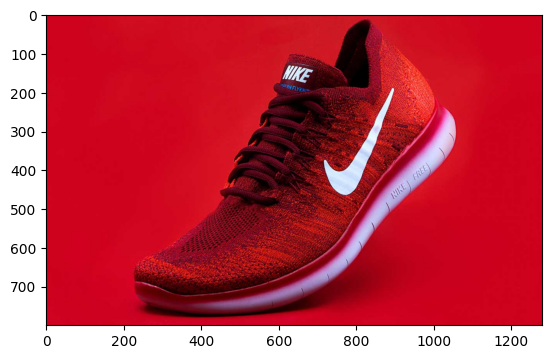

Original caption:  buty do biegania
red nike shoe score: 0.28
red nike perfume score: 0.25
red nike nail polish score: 0.25


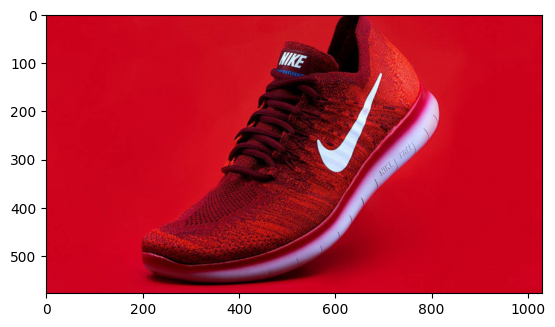

In [9]:
'''
Here I first fetch sample images, then using clip retrieval I get the top 5 most similar images
to the query image. This is the longer part of the code. 
Then we compute the similarity between the query and the embeded texts/ descriptions/ labels.
'''

imgs_files = [os.path.join('data',file) for file in os.listdir('data')]

for img_file in imgs_files:
    res = client.query(image=img_file,)
    for r in res[:5]:
        try:
            r_img = requests.get(r['url']).content
            r_img = Image.open(BytesIO(r_img))
        except:
            continue
        # compute the similarity between the query and the data
        query_tokens = preprocess(r_img).unsqueeze(0).to(device)
        with torch.no_grad():
            query_embedding = model.encode_image(query_tokens)
            query_embedding /= query_embedding.norm(dim=-1, keepdim=True)
        similarity = torch.nn.functional.cosine_similarity(data_embeddings, query_embedding)
        # get the top 3 most simialr data points
        top_3 = torch.topk(similarity, 3).indices
        scores = torch.topk(similarity, 3).values
        print('Original caption: ',r['caption'])
        # print the top 3 most similar data points
        for i,score in zip(top_3, scores):
            print(full_description[i], f"score: {score:.2f}")
        plt.imshow(r_img)
        plt.show()
        #break